Now, after having taken a look at linear regression, it makes sense to also examine logistic regression.
First, let's import some packages and generate data.

In [1]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
X1_1 = pd.Series(np.random.randn(5))
X1_2 = pd.Series(np.random.randn(5)+4)
X1 = pd.concat([X1_1, X1_2]).reset_index(drop=True)
X2 = pd.Series(np.random.randn(10))
Y = pd.Series([0,0,0,0,0,1,1,1,1,1])

In [3]:
data = pd.concat([X1, X2, Y], axis=1)
data.columns= ["X1", "X2", "Y"]

In [4]:
data

,X1,X2,Y
0,-0.919050,-0.813152,0
1,0.678458,-0.028664,0
2,-0.987853,0.524188,0
3,-1.614614,1.752247,0
4,0.250581,0.572468,0
5,4.419844,-0.205971,1
6,3.990395,0.077558,1
7,3.456785,-0.253241,1
8,4.112454,-0.262105,1
9,5.151400,0.181268,1


Let's see if we can find a linear decision boundary 

Text(0.5, 1.0, 'First Look at Data')

<Figure size 1440x1440 with 0 Axes>

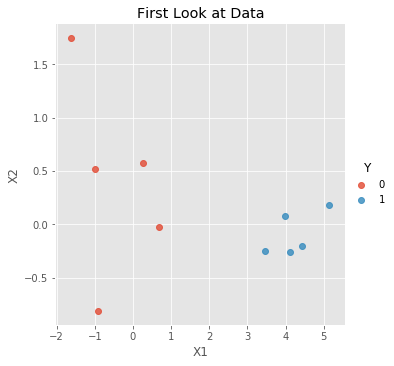

In [11]:

sns.lmplot(x="X1", y="X2", data=data, hue="Y", fit_reg=False)
plt.title('First Look at Data')

As evident from our plot, we can fit a linear decision boundary. Therefore, a logistic regression might be a good fit.

Our model will have two coefficients, $X_1$ and $X_2$. Unlike in our linear regression, we can't just use $Y = b_0 + b_1*X_1+ b_2*X_2$. Instead, we are going to have to transform our output into probabilities using the logistic function (sigmoid function): $P(Y=1|X=x) = 1/1+exp(-b_0 + b_1*X_1+ b_2*X_2)$

### Finding Coefficients

#### Make Prediction

To find our coefficients, we can again rely on stochastic gradient descent

In [30]:
#let's assign 0 to our betas to initialize them
beta0 = 0.
beta1 = 0.
beta2 = 0.

To simplify our computations, let's define a function for our sigmoid computation

In [31]:
def sigmoid(beta0, beta1, beta2, X1, X2):
    """
    Input:
    This function takes the beta parameters beta0, beta1, and beta2,
    as well as X1 and X2 as inputs
    
    Output:
    After having transformed the inputs into a real value between 0
    and 1, the function will return said value that can be interpreted
    as a probability
    """
    prepared = beta0 + beta1*X1 + beta2*X2
    prediction = 1/(1 + np.exp(-prepared))
    return prediction

Now, let's test that using our first training instance

In [34]:
X1, X2, Y = list(data.iloc[0,:])

In [37]:
first_prediction = sigmoid(beta0, beta1, beta2, X1, X2)
print("Our first prediction is {}".format(first_prediction))

Our first prediction is 0.5


#### Calculate New Coefficients

In [39]:
def update_coefficients(beta0, beta1, beta2, X1, X2, Y, prediction):
    """
    This function takes the training instance as well as the betas
    and the previously calculated prediction to update the coefficients
    """
    alpha = 0.3
    bias_of_intercept = 1.0
    beta0 = beta0 + alpha*(Y-prediction)*prediction*(1-prediction)*bias_of_intercept
    beta1 = beta1 + alpha*(Y-prediction)*prediction*(1-prediction)*X1
    beta2 = beta2 + alpha*(Y-prediction)*prediction*(1-prediction)*X2
    
    return beta0, beta1, beta2


In [40]:
beta0, beta1, beta2 = update_coefficients(beta0, beta1, beta2, X1, X2, Y, first_prediction)
print("Our updated parameters are:\nbeta0: {}\nbeta1: {}\nbeta2: {}".format(beta0, beta1, beta2))

Our updated parameters are:
beta0: -0.0375
beta1: -0.020980870585683948
beta2: -0.03909196554528134


Now, we certainly aren't going to manually repeat that for all training instances/epochs. Therefore, let's write some code that'll do so for us.

In [83]:
def putting_it_together(epochs=1, learning_rate=0.3, cutoff=0.5):
    """
    This function performs a stochastic gradient descent
    and returns the final coefficients
    """
    beta0 = 0.
    beta1 = 0.
    beta2 = 0.
    bias_of_intercept = 1.0
    alpha = learning_rate
    

    for i in range(1,epochs+1):
        
        correct_predictions = 0
        print('\nThis is epoch number {}:\n'.format(i), '-'*60)
        
        for n in range(len(data.X1)):

            X1 = data.iloc[n,0]
            X2 = data.iloc[n,1]
            Y = data.iloc[n,2]

            prediction = sigmoid(beta0, beta1, beta2, X1, X2)

            beta0, beta1, beta2 = update_coefficients(beta0, beta1, beta2, X1, X2, Y, prediction)
            
            if prediction < cutoff:
                class_ = 0
            else:
                class_ = 1
                
            if class_ == Y:
                correct_predictions+=1
            else:
                continue

            print('(Instance Number {}) Beta0: {:.3f}, Beta1: {:.3f}, Beta2: {:.3f}, prediction: {}, class: {}, actual class: {}'.format(n+1, beta0, beta1, beta2, prediction, class_, Y))
        
        accuracy = (correct_predictions/len(data.X1))*100
        print('\nAccuracy of this epoch: {}%\n'.format(accuracy), '-'*60)
    return beta0, beta1, beta2


In [84]:
putting_it_together(cutoff = 0.51)


This is epoch number 1:
 ------------------------------------------------------------
(Instance Number 1) Beta0: -0.037, Beta1: -0.021, Beta2: -0.039, prediction: 0.5, class: 0, actual class: 0
(Instance Number 2) Beta0: -0.074, Beta1: -0.010, Beta2: -0.035, prediction: 0.49318256187851595, class: 0, actual class: 0
(Instance Number 3) Beta0: -0.110, Beta1: 0.030, Beta2: -0.061, prediction: 0.4777504730569901, class: 0, actual class: 0
(Instance Number 4) Beta0: -0.144, Beta1: 0.069, Beta2: -0.078, prediction: 0.45645333162008134, class: 0, actual class: 0
(Instance Number 5) Beta0: -0.181, Beta1: 0.104, Beta2: -0.008, prediction: 0.48480217726825375, class: 0, actual class: 0
(Instance Number 6) Beta0: -0.148, Beta1: 0.239, Beta2: 0.003, prediction: 0.5623015703558849, class: 1, actual class: 1
(Instance Number 7) Beta0: -0.130, Beta1: 0.317, Beta2: 0.018, prediction: 0.709114917067449, class: 1, actual class: 1
(Instance Number 8) Beta0: -0.121, Beta1: 0.361, Beta2: 0.006, predictio

(-0.09365218577751816, 0.4327485087356591, 0.06966238871399635)

Done! After slighty adjusting the cut-off probability, we manage to achieve 100% accuracy, where $Accuracy = (Correct Predictions/Total Predictions) * 100$